In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from sklearn.preprocessing import LabelEncoder

**Data Understanding and Preparation**:Load the metadata and explore its structure, as well as check for missing values, data types, and basic statistics

In [ ]:
metadata_path = 'Data/TCGA-BRCA/metadata.csv'
metadata = pd.read_csv(metadata_path)
print(metadata.info())
print(metadata.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series UID            1784 non-null   object 
 1   Collection            1784 non-null   object 
 2   3rd Party Analysis    0 non-null      float64
 3   Data Description URI  1784 non-null   object 
 4   Subject ID            1784 non-null   object 
 5   Study UID             1784 non-null   object 
 6   Study Description     1520 non-null   object 
 7   Study Date            1784 non-null   object 
 8   Series Description    1750 non-null   object 
 9   Manufacturer          1784 non-null   object 
 10  Modality              1784 non-null   object 
 11  SOP Class Name        1784 non-null   object 
 12  SOP Class UID         1784 non-null   object 
 13  Number of Images      1784 non-null   int64  
 14  File Size             1784 non-null   object 
 15  File Location        

**Check for missing values**

In [6]:
print(metadata.isnull().sum())

print(metadata.describe())

Series UID                 0
Collection                 0
3rd Party Analysis      1784
Data Description URI       0
Subject ID                 0
Study UID                  0
Study Description        264
Study Date                 0
Series Description        34
Manufacturer               0
Modality                   0
SOP Class Name             0
SOP Class UID              0
Number of Images           0
File Size                  0
File Location              0
Download Timestamp         0
dtype: int64
       3rd Party Analysis  Number of Images
count                 0.0       1784.000000
mean                  NaN        106.571188
std                   NaN        136.495059
min                   NaN          1.000000
25%                   NaN         39.000000
50%                   NaN         72.000000
75%                   NaN        120.000000
max                   NaN       1500.000000


**Data Cleaning**

In [7]:
threshold = len(metadata) * 0.5
metadata = metadata.dropna(axis=1, thresh=threshold)
metadata.fillna(method='ffill', inplace=True)
metadata.drop_duplicates(inplace=True)
print(metadata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Series UID            1784 non-null   object
 1   Collection            1784 non-null   object
 2   Data Description URI  1784 non-null   object
 3   Subject ID            1784 non-null   object
 4   Study UID             1784 non-null   object
 5   Study Description     1520 non-null   object
 6   Study Date            1784 non-null   object
 7   Series Description    1784 non-null   object
 8   Manufacturer          1784 non-null   object
 9   Modality              1784 non-null   object
 10  SOP Class Name        1784 non-null   object
 11  SOP Class UID         1784 non-null   object
 12  Number of Images      1784 non-null   int64 
 13  File Size             1784 non-null   object
 14  File Location         1784 non-null   object
 15  Download Timestamp    1784 non-null   

<ipython-input-7-01995f5f096f>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata.fillna(method='ffill', inplace=True)
<ipython-input-7-01995f5f096f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.fillna(method='ffill', inplace=True)


**Exploratory Data Analysis (EDA)**:Visualize the distribution of key clinical features and Analyze the correlation between numerical features, as well as Explore categorical distributions.

In [9]:
age_columns = [col for col in metadata.columns if 'age' in col.lower()]
print(age_columns)
tumor_columns = [col for col in metadata.columns if 'tumor' in col.lower()]
print(tumor_columns)

['Number of Images']
[]


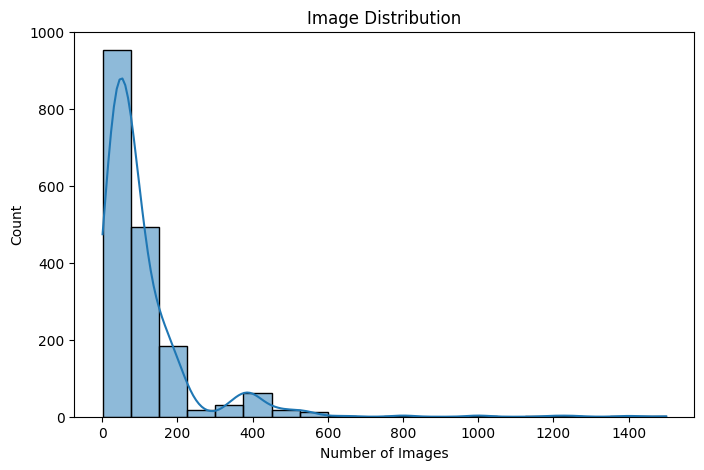

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(metadata['Number of Images'], bins=20, kde=True)
plt.title('Image Distribution')
plt.show()

# plt.figure(figsize=(8, 5))
# sns.countplot(data=metadata, x='tumor_stage')
# plt.title('Tumor Stage Distribution')
# plt.show()

**Correlation heatmap for numerical columns**

In [15]:
print(metadata.dtypes)

Series UID              object
Collection              object
Data Description URI    object
Subject ID              object
Study UID               object
Study Description       object
Study Date              object
Series Description      object
Manufacturer            object
Modality                object
SOP Class Name          object
SOP Class UID           object
Number of Images         int64
File Size               object
File Location           object
Download Timestamp      object
dtype: object


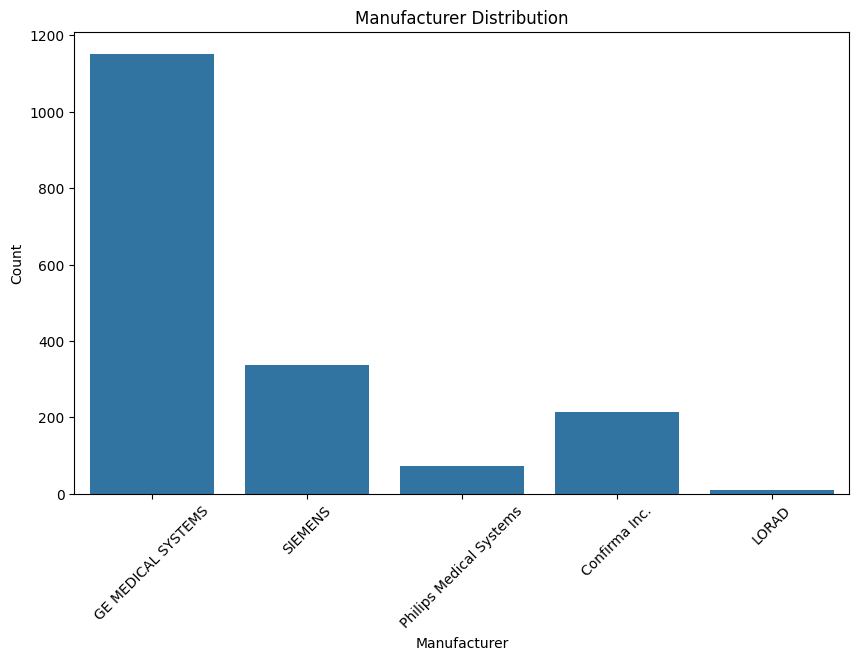

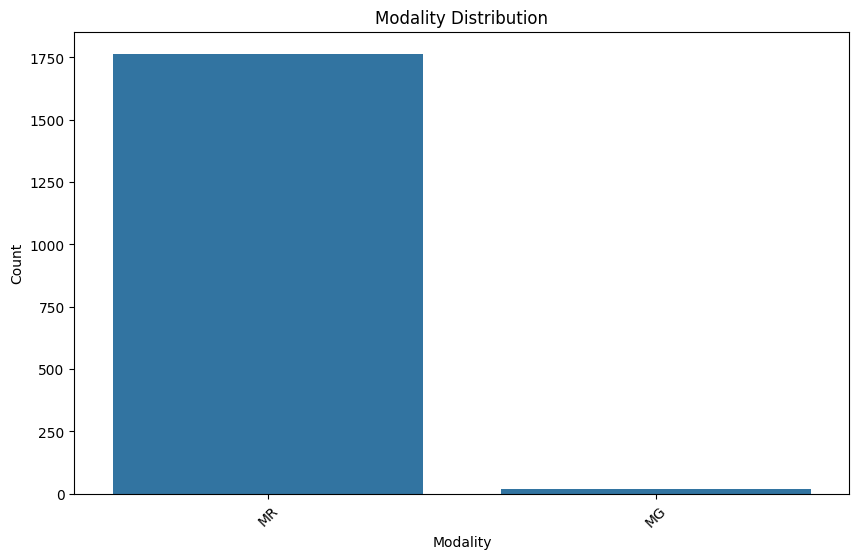

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Manufacturer', data=metadata)
plt.title('Manufacturer Distribution')
plt.xticks(rotation=45)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Modality', data=metadata)
plt.title('Modality Distribution')
plt.xticks(rotation=45)
plt.xlabel('Modality')
plt.ylabel('Count')
plt.show()


**Handling Categorical Data for Correlation Analysis**

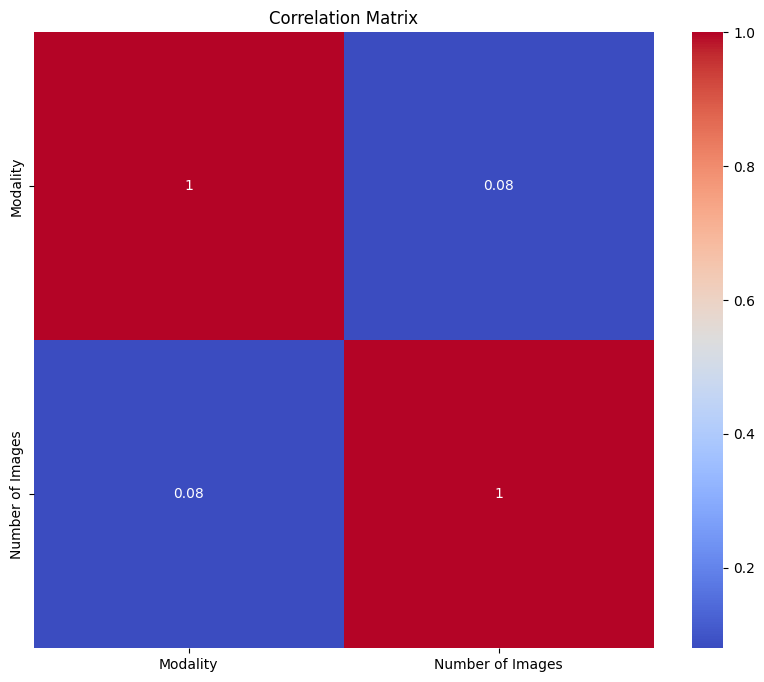

In [20]:
metadata_encoded = pd.get_dummies(metadata, drop_first=True)

label_encoder = LabelEncoder()
metadata['Modality'] = label_encoder.fit_transform(metadata['Modality'])

numeric_metadata = metadata_encoded.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_metadata.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

